# What find in this notebook?

1. Extract "RED" component from flower's image
1. Function to binarize "RED" component: Parameters (image and threshold)
1. Function to find all conections in a region around one reference coordinate: Parameters (image and reference coordinate)
1. Fucntion to calculate dimensions of flower using euclidian distance, D4 (city-block distance) and D8 (chessboard distance)

In [1]:
%matplotlib inline
import cv2

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import datetime
import math

In [2]:
img = cv2.imread('flower.jpg')


In [3]:
blue, green, red = cv2.split(img)

In [4]:
def check_threshold(x, threshold):
    return 0 if x < threshold else 255

def make_binary_image(image, threshold):
    vectorize_threshold = np.vectorize(check_threshold)
    return vectorize_threshold(image, threshold)
            

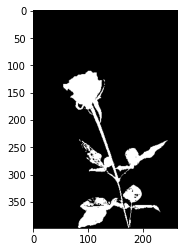

In [5]:

binary_image = make_binary_image(red, 50)

cv2.imwrite("binary_image.jpg", cv2.cvtColor(np.uint8(binary_image), cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(np.uint8(binary_image), cv2.COLOR_BGR2RGB))

In [6]:
# Adjacency functions

def adjacency_four(image, coordinate, rows, columns):
    
    adjacency_coordinates = []
    
    has_top = True if coordinate[0]-1 >= 0 else False
    top = coordinate[0]-1
    has_bot = True if coordinate[0]+1 < rows else False
    bot = coordinate[0]+1
    this_row = coordinate[0]

    has_left = True if coordinate[1]-1 >= 0 else False
    left = coordinate[1]-1
    has_right = True if coordinate[1]+1 < columns else False
    right = coordinate[1]+1
    this_column = coordinate[1]
    
    if(has_bot and (image[bot][this_column] == 255)):
        adjacency_coordinates.append([bot,this_column])

    if(has_top and (image[top][this_column] == 255)):
        adjacency_coordinates.append([top,this_column])

    if(has_right and (image[this_row][right] == 255)):
        adjacency_coordinates.append([this_row,right])

    if(has_left and (image[this_row][left] == 255)):
        adjacency_coordinates.append([this_row,left])

    return adjacency_coordinates
    
def adjacency_diagonal(image, coordinate, rows, columns):
    
    adjacency_coordinates = []
    
    has_top = True if coordinate[0]-1 >= 0 else False
    top = coordinate[0]-1
    has_bot = True if coordinate[0]+1 < rows else False
    bot = coordinate[0]+1
    this_row = coordinate[0]

    has_left = True if coordinate[1]-1 >= 0 else False
    left = coordinate[1]-1
    has_right = True if coordinate[1]+1 < columns else False
    right = coordinate[1]+1
    this_column = coordinate[1]

    if(has_bot and has_right and (image[bot][right] == 255)):
        adjacency_coordinates.append([bot,right])

    if(has_bot and has_left and (image[bot][left] == 255)):
        adjacency_coordinates.append([bot,left])

    if(has_top and has_right and (image[top][right] == 255)):
        adjacency_coordinates.append([top,right])

    if(has_top and has_left and (image[top][left]) == 255):
        adjacency_coordinates.append([top,left])
    
    return adjacency_coordinates

def adjacency_eight(image, coordinate, rows, columns):
    
    return adjacency_four(image, coordinate, rows, columns) + adjacency_diagonal(image, coordinate, rows, columns)
    
def adjacency_mixed(image, coordinate, rows, columns):
    adjacency_coordinates = []
    coordinate_adjacency_four = adjacency_four(image, coordinate, rows, columns)
    
    for each_coordinate in adjacency_diagonal(image, coordinate, rows, columns):
        for each_coordinate_of_diagonal in adjacency_four(image, each_coordinate, rows, columns):
            if(each_coordinate_of_diagonal in coordinate_adjacency_four):
                adjacency_coordinates.append(each_coordinate_of_diagonal)
    
    return coordinate_adjacency_four + adjacency_coordinates
       
# Choose the adjacency type
adjacency_types = {0: adjacency_four, 1: adjacency_diagonal, 2: adjacency_eight, 3: adjacency_mixed}

def detect_connection(image, image_with_zeros, coordinate, rows, columns, adjacency_type):
    if(image_with_zeros[coordinate[0]][coordinate[1]] == 255):
        return None
       
    if(image[coordinate[0]][coordinate[1]] == 255):
        
        image_with_zeros[coordinate[0]][coordinate[1]] = 255
        adjacency_function = adjacency_types.get(adjacency_type, lambda: "Invalid adajacent")
        coordinates_connected = adjacency_function(image, coordinate, rows, columns)
        for each_coordinate in coordinates_connected:
            detect_connection(image, image_with_zeros, each_coordinate, rows, columns, adjacency_type)
    else:
        return None
        

# Here we can click on the image to choose the image's coordinate

In [7]:
#default coordinate
chosen_coordinates = [150,100]

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(4,3))

img=mpimg.imread("binary_image.jpg")

def onclick(event):
    ix, iy = event.xdata, event.ydata
    global chosen_coordinates
    chosen_coordinates = [int(math.floor(iy)),int(math.floor(ix))]
    plt.close()

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
# Generate regions to all adjacency type

rows = red.shape[0]
columns = red.shape[1]


image_with_zeros_four = np.zeros((rows, columns))
image_with_zeros_diagonal = np.zeros((rows, columns))
image_with_zeros_eight = np.zeros((rows, columns))
image_with_zeros_mixed = np.zeros((rows, columns))

detect_connection(binary_image, image_with_zeros_four, chosen_coordinates, rows, columns, 0)
detect_connection(binary_image, image_with_zeros_diagonal, chosen_coordinates, rows, columns, 1)
detect_connection(binary_image, image_with_zeros_eight, chosen_coordinates, rows, columns, 2)
detect_connection(binary_image, image_with_zeros_mixed, chosen_coordinates, rows, columns, 3)

images = [binary_image, image_with_zeros_four, image_with_zeros_diagonal, image_with_zeros_eight, image_with_zeros_mixed]

c:\users\atila\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


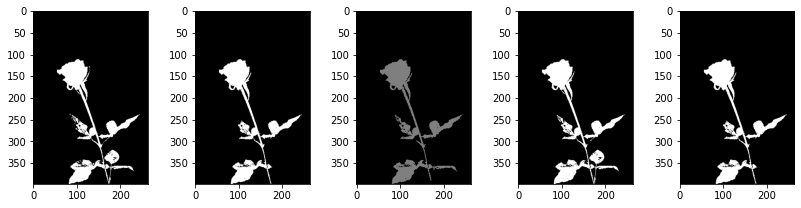

In [13]:
%matplotlib inline

plt.figure(figsize=(14,7))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(cv2.cvtColor(np.uint8(image), cv2.COLOR_BGR2RGB))

In [11]:
# Functions to calculate distancies

import math

def get_extremes_coordinates_in_image(image):
    extremes = []
    
    rows = image.shape[0]
    columns = image.shape[1]
    
    coordinates = []
    
    min_in_x = [red.shape[0], red.shape[1]]
    max_in_x = [0,0]
    min_in_y = [red.shape[0], red.shape[1]]
    max_in_y = [0,0]
    
    for x in range(rows):
        for y in range(columns):
            if(image[x][y] == 255):
                if(x < min_in_x[0]):
                    min_in_x = [x,y]
                if(x > max_in_x[0]):
                    max_in_x = [x,y]
                if(y < min_in_y[1]):
                    min_in_y = [x,y]
                if(y > max_in_y[1]):
                    max_in_y = [x,y]
    
    return [min_in_x, max_in_x, min_in_y, max_in_y]
    
def get_distance_eight(extremes):
    return max(abs(extremes[0][0]-extremes[1][0]),abs(extremes[0][1]-extremes[1][1])), max(abs(extremes[2][0]-extremes[3][0]),abs(extremes[2][1]-extremes[3][1]))

def get_distance_four(extremes):
    return abs(extremes[0][0]-extremes[1][0]) + abs(extremes[0][1]-extremes[1][1]), abs(extremes[2][0]-extremes[3][0]) + abs(extremes[2][1]-extremes[3][1])

def get_euclidian_distance(extremes):
    return math.sqrt((abs(extremes[0][0]-extremes[1][0])**2) + (abs(extremes[0][1]-extremes[1][1]))**2), math.sqrt((abs(extremes[2][0]-extremes[3][0])**2) + (abs(extremes[2][1]-extremes[3][1])**2))


In [12]:
extremes = get_extremes_coordinates_in_image(image_with_zeros_mixed)
print("Distance 4 - " + str(get_distance_four(extremes)))
print("Distance 8 - " + str(get_distance_eight(extremes)))
print("Distance euclidian - " + str(get_euclidian_distance(extremes)))

Distance 4 - (303, 292)
Distance 8 - (286, 189)
Distance euclidian - (286.50479926172267, 215.24404753674375)
